# 1. Plotting for Exploratory data analysis (EDA)

# (1.1) Haberman Dataset:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np                

#importing numpy,pandas,matplotlib,seaborn packages 
#which help me for mathematical operations and plotting the data  and exploring the data

In [2]:
haberman = pd.read_csv("haberman.csv")    #The file in csv(comma seperated values) format 

In [3]:
print(haberman.shape)  #it prints how many data-points and features in the dataset

(306, 4)


In [4]:
print(haberman.columns)  #prints columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
haberman["status"].value_counts()  

#prints how many classes is there and prints how many points in each class
#Haberman is imbalanced dataset
#haberman consist 2 Diff-Classes 
    #(i). status1 :The Person Survive more than 5Years(5<x)
    #(ii). status2 : The Persin survive less than 5years(5>x)

1    225
2     81
Name: status, dtype: int64

# (1.2) 2-D Scatter Plot

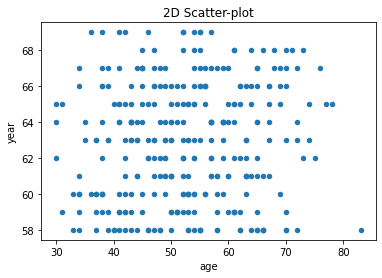

In [6]:
haberman.plot(kind = "scatter", x = "age", y = "year" )   
plt.title("2D Scatter-plot")       #make a title for the plot
plt.show()    #prints plot by given values 


**Observations :**

1.From the above plot all the points are overlapping and having the same color.

2.we cant classify them.

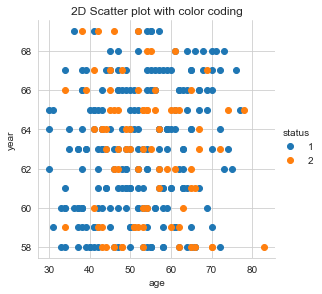

In [7]:
#2-D Scatter plot with color coding for each type/Class

sns.set_style("whitegrid");       #"sns" refers to seaborn
sns.FacetGrid(haberman , hue = "status", height = 4) \
   .map(plt.scatter, "age", "year") \
   .add_legend() #Adding legends to the plot
plt.title("2D Scatter plot with color coding")
plt.show()

**Observations :**

1.From Seaborn we are importing FacetGrid for better classification 

2.we are using two features like "age" on X-axis and "year" on Y-axis.

3.status = 1(blue) :The person survive more than 5years
          , status = 2(orange) :The Person survive less than 5years

4.Status_1 and status_2 points are overlapping.

# (1.3) Pair-plot


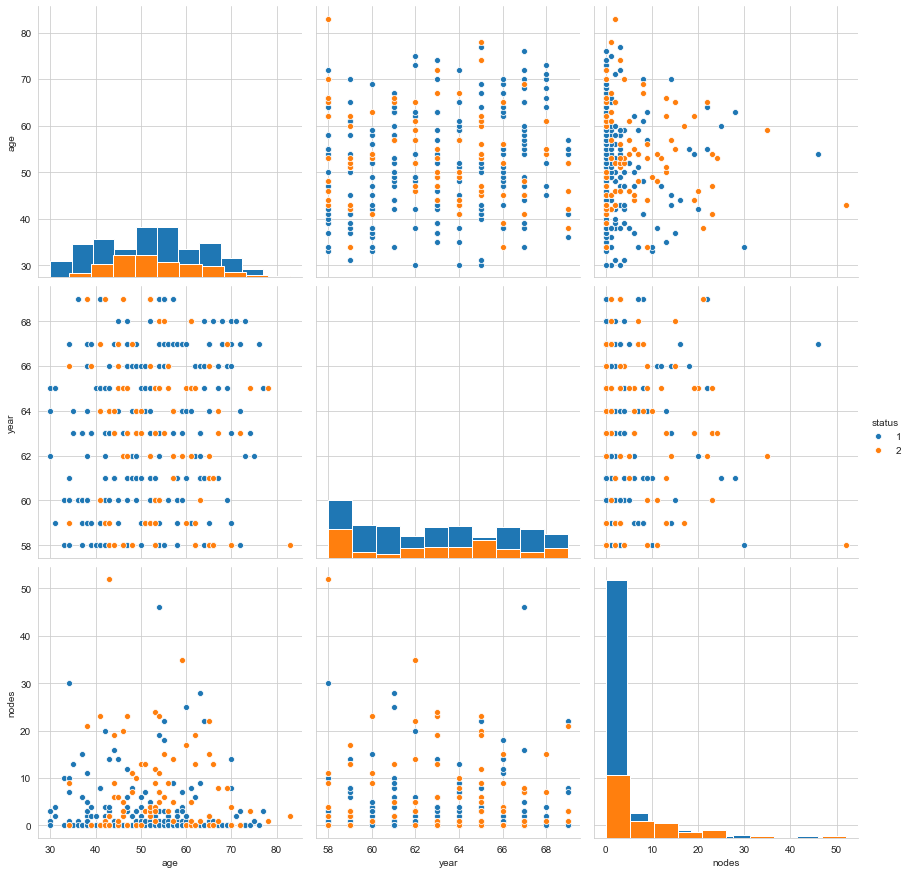

In [8]:
#Pair-wise Scatter plot :pair-plot 
#The below diagram is the combination of all the plots of given Features in the data
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman,diag_kind = 'hist', hue='status', vars=['age','year','nodes'],height=4) 
plt.show()

**Observations**
1. age and year are the most useful features to identify various class/types.
2. from the plot_num 3 and plot_num 7 the points are lineraly seperable 
3. plot1, plot5, plot9 are histograms
4. we can use features like age and nodes for further data Opertaions



# (1.4) Histogram, PDF, CDF

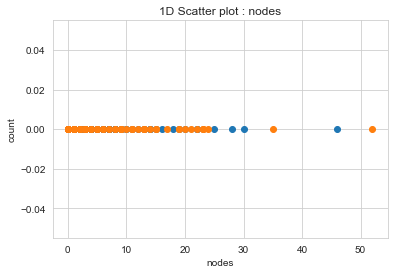

In [9]:
# 1-D Scatter plot using the Feature "nodes"
# We are using numpy for plotting 1-D scatter plot
import numpy as np
haberman_long_survive = haberman.loc[haberman["status"] == 1];  # Status == 1 belongs to 225/306(Survive more than 5years)
haberman_short_survive = haberman.loc[haberman["status"] == 2]; # status == 2 belongs to 81/306(Survive less than 5years)

plt.plot(haberman_long_survive["nodes"], np.zeros_like(haberman_long_survive["nodes"]),'o')
plt.plot(haberman_short_survive["nodes"], np.zeros_like(haberman_short_survive["nodes"]), 'o')
plt.title("1D Scatter plot : nodes")
plt.xlabel("nodes")
plt.ylabel("count")
plt.show()

# most of the points are Overlapping 
# Disadvantage of the plot is we cant make a sense out of it

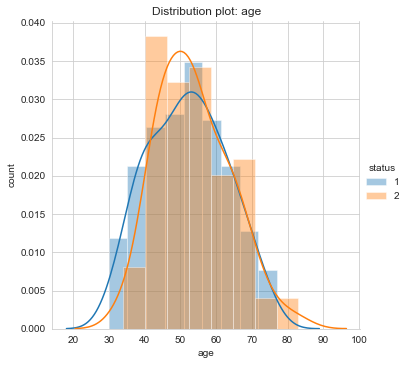

In [10]:
sns.FacetGrid(haberman , hue = "status", height = 5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Distribution plot: age")
plt.ylabel("count")
plt.show()


**Observations:**

1.from the above plot the age of person 35 to 75 having same status for survival and death

2.we cant predict anything from above plot

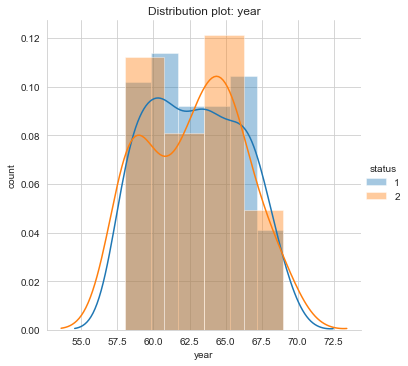

In [11]:
sns.FacetGrid(haberman , hue = "status" , height = 5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Distribution plot: year")
plt.ylabel("count")
plt.show()

**Observations :**

1.from above plot the we can conclude that all the points are mostly overlapping

2.we cant pridict anything from the above plot

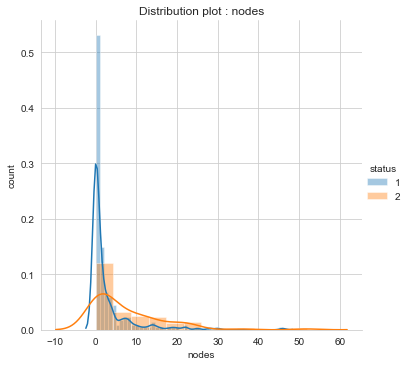

In [12]:
sns.FacetGrid(haberman , hue = "status" , height = 5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Distribution plot : nodes")
plt.ylabel("count")
plt.show()

**Observations : **
    

    1.from the above Histogram,pdf,cdf diagrams the person who is having less Nodes(Feature) will survive longer compare to the other Features(Age and Year)
    
    2.from pdf we cant caliculate patient survival status 
    
    3.Cdf(cumulative Distribution Function) we can caliculate the survival status of the person

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


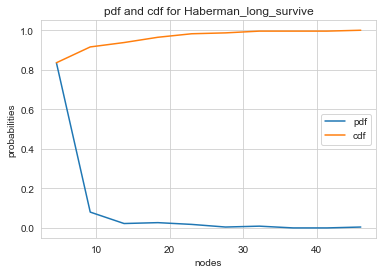

In [13]:
# plotttinfg the pdf and cdf for Haberman_long_survive data .
# from the pdf we cant find accurate percentage of person who live longer and who live shorter
#from the cdf we can caliculate survival status of a person


counts, bin_edges = np.histogram(haberman_long_survive['nodes'], bins = 10, density = True)

pdf = counts / (sum(counts))    #Formula for PDF(probability density function)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)            #formula for CDF(cumulative distribution function)
plt.plot(bin_edges[1:], pdf,label = "pdf")
plt.plot(bin_edges[1:], cdf, label = "cdf")
plt.title("pdf and cdf for Haberman_long_survive")
plt.xlabel("nodes")
plt.ylabel("probabilities")
plt.legend()
plt.show()

** Observation : **
    
    1. Cdf for haberman_long_survive 
    2. pdf formula : pdf = counts / (sum(counts))
    3. cdf formula : cdf = np.cumsum(pdf)     np = numpy , cumsum = Cumilative sum

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


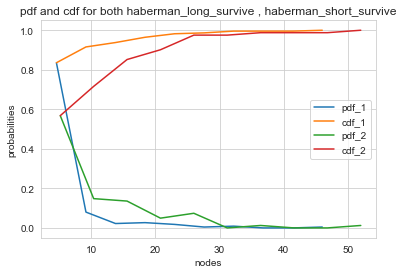

In [14]:
#we are plotting the both Haberman_long_survive and Haberman_short_survive 
#we can easily understands that survival status of the persons 


#prints pdf and cdf for Haberman_long_survive
counts, bin_edges = np.histogram(haberman_long_survive['nodes'], bins = 10, density = True)

pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)    #using numpy we can caliculate cumulative sum of pdf which equals to cdf value
plt.plot(bin_edges[1:], pdf,label = "pdf_1")   #prints pdf's bin_edges from 1
plt.plot(bin_edges[1:], cdf, label = "cdf_1")   #prints cdf'ss bin_edges from 1



#prints pdf and cdf for Haberman_short_survive
counts, bin_edges = np.histogram(haberman_short_survive['nodes'], bins = 10, density = True)

pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,label = "pdf_2")
plt.plot(bin_edges[1:], cdf, label = "cdf_2")
plt.title("pdf and cdf for both haberman_long_survive , haberman_short_survive")  #prints title,x_label,y_label
plt.xlabel("nodes")
plt.ylabel("probabilities")
plt.legend()
plt.show()

** Obsevations : **
    
    1.cdf for both haberman_long_survive and haberman_short_survive 
    2.Blue(pdf) and Orange(cdf) for Haberman_long_survive
    3.green(pdf) and red(cdf) for haberman_short_survive 

# (1.5) Mean, Variance and Std-dev

In [15]:
#finding mean and std.dev for both long_survive and short_survive

print("means:")
print(np.mean(haberman_long_survive["nodes"]))
print(np.mean(np.append(haberman_long_survive["nodes"], 50)))  #mean with an outlier
print(np.mean(haberman_short_survive["nodes"]))

print("\nstd.dev :")
print(np.std(haberman_long_survive["nodes"]))
print(np.std(haberman_short_survive["nodes"]))


means:
2.7911111111111113
3.0
7.45679012345679

std.dev :
5.857258449412131
9.128776076761632


# (1.6) Median, Percentile, Quantile, IQR, MAD

In [16]:
print("Medians :")   #prints median for both haberman_long_survive and haberman_short_survive
print(np.median(haberman_long_survive["nodes"]))
print(np.median(np.append(haberman_long_survive["nodes"],50)))  #median with an outlier
print(np.median(haberman_short_survive["nodes"]))


print("\nQuantiles :")  #prints Quantile for both haberman_long_survive and haberman_short_survive
print(np.percentile(haberman_long_survive["nodes"], np.arange(0,100,25)))
print(np.percentile(haberman_short_survive["nodes"], np.arange(0,100,25)))



print("\nPercentile :") #prints Percentile for both haberman_long_survive and haberman_short_survive
print(np.percentile(haberman_long_survive["nodes"], 90))
print(np.percentile(haberman_short_survive["nodes"], 90))


from statsmodels import robust    #importing robust model from statsmodel 
print("\nMedian absolute deviation :")   #prints Median absolute Deviation for both haberman_long_survive and haberman_short_survive
print(robust.mad(haberman_long_survive["nodes"]))
print(robust.mad(haberman_short_survive["nodes"]))

Medians :
0.0
0.0
4.0

Quantiles :
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Percentile :
8.0
20.0

Median absolute deviation :
0.0
5.930408874022408


# (1.7) Box plot and Whiskers

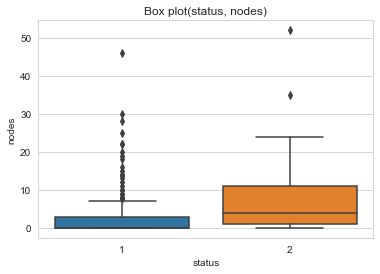

In [17]:
#Box-plots can be represented all the data between 25th percentile and 75th percentile
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.
sns.boxplot(x = "status", y = "nodes", data = haberman)  # "sns" stands for seaborn
plt.legend
plt.title("Box plot(status, nodes)")
plt.show()

**Observations ** 
1. from the above plot we can conclude that status = 1 is Haberman_long_survive having the values from 0 to 8 and haberman_short _survive having values from 2 to 24 
2. Both values are overlapping in the above plot 
3. long survival 25% of points is mostly equal to 50% of short survival values
4. shorrt survival having 50% values same as 75% of long survive 



# (1.8) Violin plots

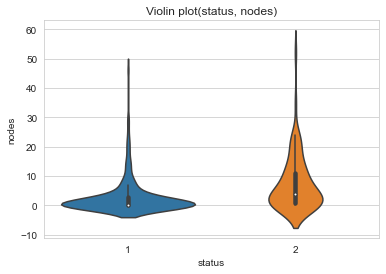

In [18]:
#violin plots is combination of both Box-plots and Pdf
sns.violinplot(x = "status", y = "nodes" , data = haberman)
plt.title("Violin plot(status, nodes)")
plt.show();

**Observations **
1. from above plot we can understand the long survive plot is mostly overlap with the short survive
2. long survive having density value from 0-8 
3. short survive having density value from 2-24


# (1.9) Multivariate probability density, contour plot.


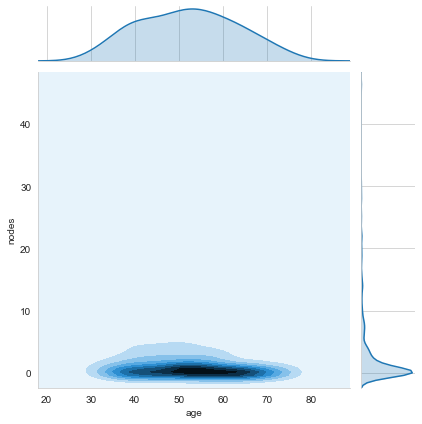

In [19]:
#contour plot is like density plots the more points placed at a point the data looks like darker 
#having less points at a place shows light color having more points looks like thicker color
sns.jointplot(x = "age", y = "nodes", data = haberman_long_survive, kind = "kde")  #kind of the plot is kde
plt.show()

**Observations ** 
1. above plot we can understand that the more thicker consist of more number of points lies in that region
2. less number of points shows like shade color
3. no of data points is more the area gets darker color we can visualize like hill like structure , the top of hill having high density and slope of a hill have less density
